#### Project Plan 
* 1. Get the data
* 2. Clean the data
* 3. Exploratory data analysis
* 4. Feature engineering
* 5. Preprocessing
* 6. Modelling
* 7. Hyperparameter tuning
* 8. Perfomance evaluation



### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import wolta

### Dataset source:

In [2]:
# https://archive.ics.uci.edu/dataset/186/wine+quality

### Data descriptions

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
<br>Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection
<br>algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

## Potential Project Goals
## 1) use regression to predict quality of red wine based on smell - can be applied in real world with a device that can analyze and/or rate wines without consumption

### Volatile acidity – contributes to the aroma of wine, as it involves acetic acid.
### Alcohol – influences the perception of aromas by enhancing volatility.
### Sulphates – impact the <b><u>freshness</u></b> of aromas and can affect smell.
### Citric acid – contributes to freshness, which can influence the perception of fruit-related aromas.
### Residual sugar – though more about taste, it can enhance the perception of fruity or floral aromas by increasing the overall sensory experience.

In [3]:
df=pd.read_csv('winequality-red.csv', sep=r';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Focus on the 5 attributes related to aroma, and the quality score:

In [4]:
# Volatile Acidity
df['volatile acidity'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599.0,0.527821,0.17906,0.12,0.39,0.52,0.64,1.58


In [5]:
# Sulphates
df['sulphates'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
sulphates,1599.0,0.658149,0.169507,0.33,0.55,0.62,0.73,2.0


In [6]:
# Alcohol
df['alcohol'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
alcohol,1599.0,10.422983,1.065668,8.4,9.5,10.2,11.1,14.9


In [7]:
# Citric Acid
df['citric acid'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
citric acid,1599.0,0.270976,0.194801,0.0,0.09,0.26,0.42,1.0


In [8]:
# Residual Sugar
df['residual sugar'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
residual sugar,1599.0,2.538806,1.409928,0.9,1.9,2.2,2.6,15.5


In [9]:
# Quality
df['quality'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
quality,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0


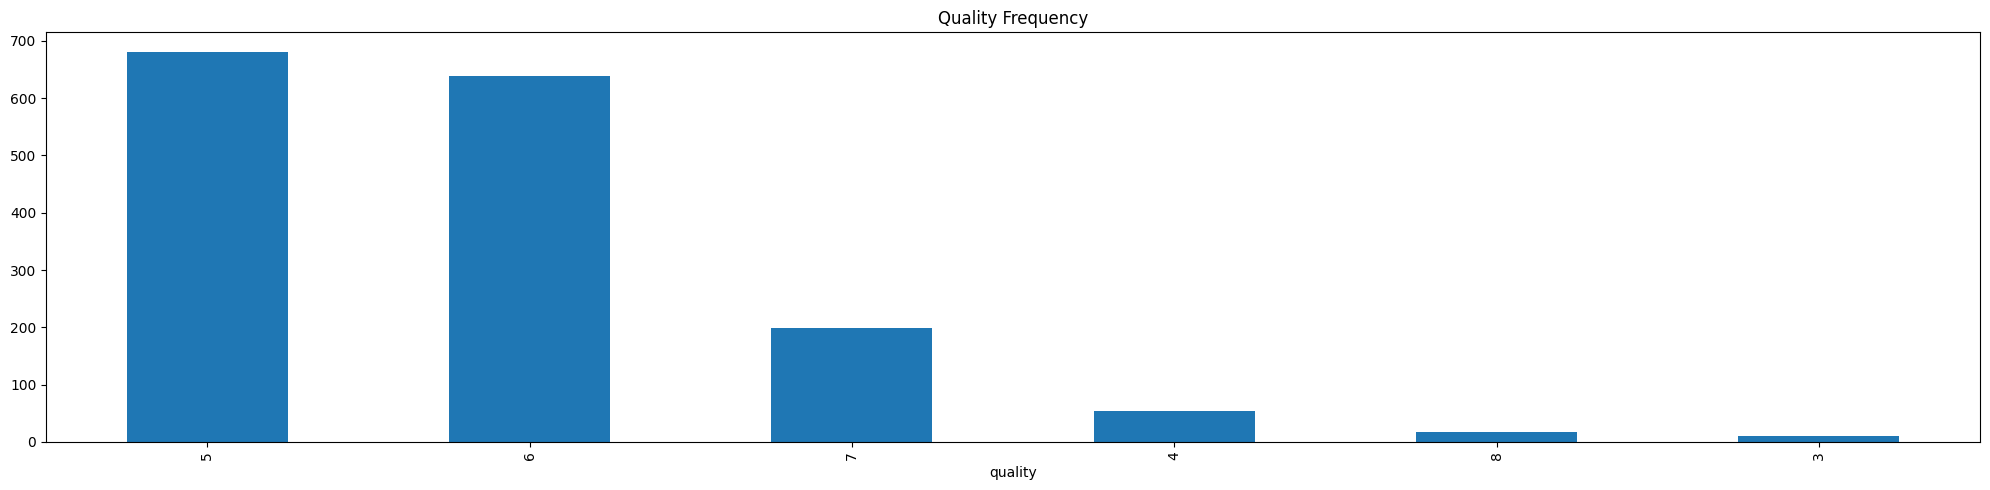

In [10]:
plt.figure(figsize=(20,5))
plt.title('Quality Frequency', )
df['quality'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()

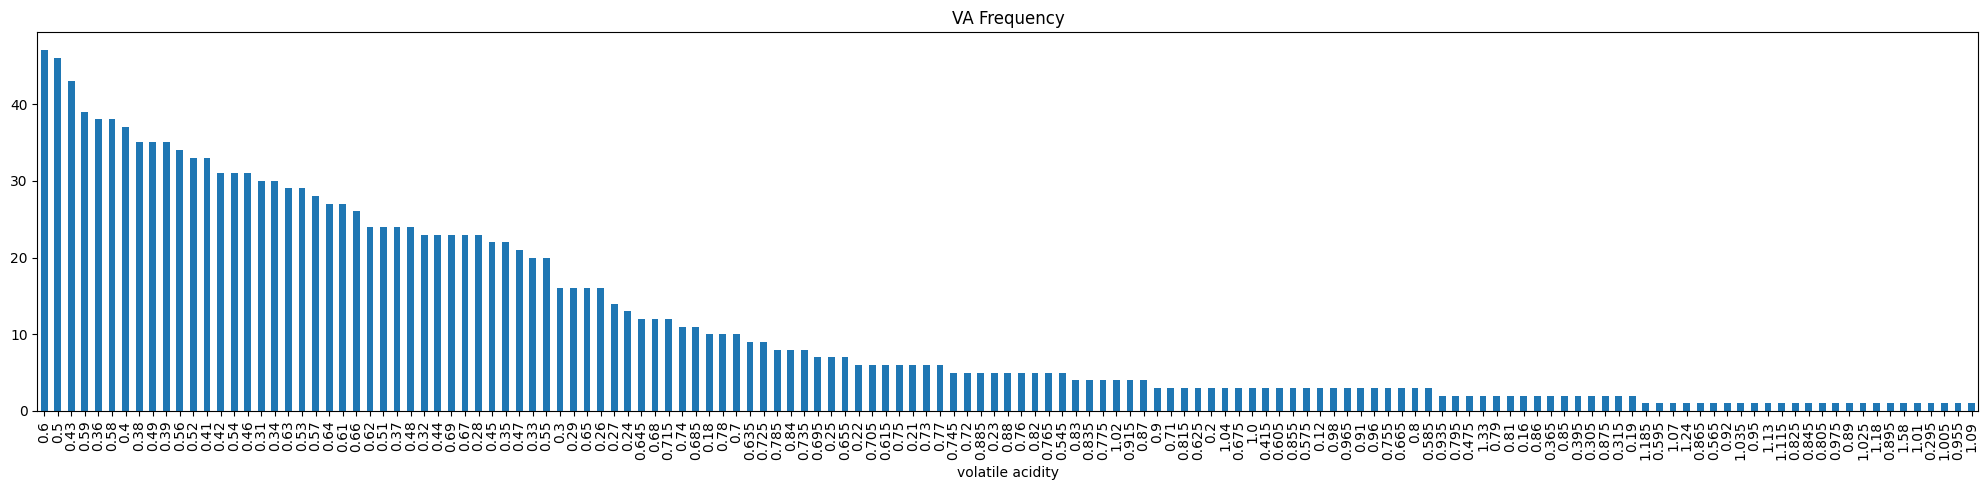

In [11]:
plt.figure(figsize=(20,5))
plt.title('VA Frequency', )
df['volatile acidity'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()

valu overlays

In [12]:
df['quality'].sort_values(ascending=False).head()

495     8
1403    8
390     8
1061    8
1202    8
Name: quality, dtype: int64

In [13]:
df['volatile acidity'].sort_values(ascending=False).tail()

1566    0.16
1286    0.16
950     0.12
949     0.12
948     0.12
Name: volatile acidity, dtype: float64

In [14]:
# missing values
df.isnull().describe().T

,count,unique,top,freq
fixed acidity,1599,1,False,1599
volatile acidity,1599,1,False,1599
citric acid,1599,1,False,1599
residual sugar,1599,1,False,1599
chlorides,1599,1,False,1599
free sulfur dioxide,1599,1,False,1599
total sulfur dioxide,1599,1,False,1599
density,1599,1,False,1599
pH,1599,1,False,1599
sulphates,1599,1,False,1599


In [15]:
wolta.data_tools.col_types(df)

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'int64']

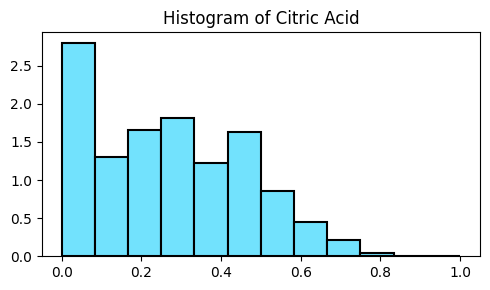

In [16]:
plt.figure(figsize=(5,3))
plt.hist(
    df['citric acid'],
    density=True,
    bins=12,
    edgecolor='black',
    linewidth=1.5,
    color='#72e2fd'
)

plt.title('Histogram of Citric Acid')
plt.tight_layout()
plt.show()

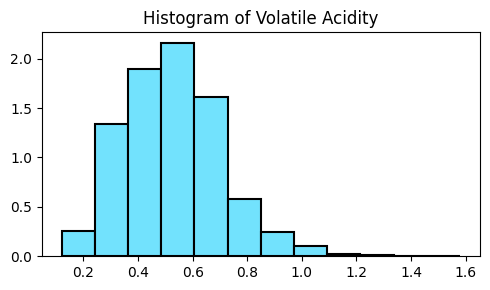

In [17]:
plt.figure(figsize=(5,3))
plt.hist(
    df['volatile acidity'],
    density=True,
    bins=12,
    edgecolor='black',
    linewidth=1.5,
    color='#72e2fd'
)

plt.title('Histogram of Volatile Acidity')
plt.tight_layout()
plt.show()

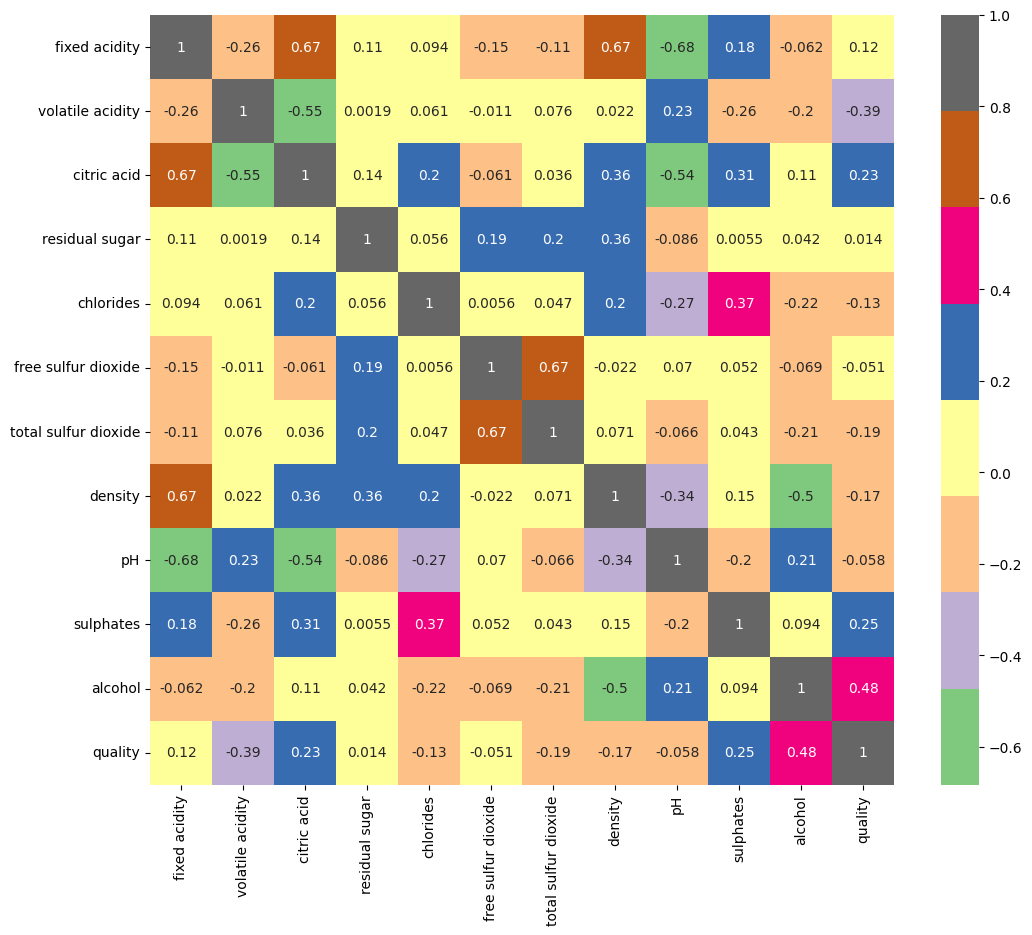

In [18]:
# pearson correlation
df.corr(method='pearson')
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()

Top 5 Aroma characteric correlations to Quality:
<br>alcohol = 0.48 (MODERATE)
<br>sulphates = 0.25 (WEAK)
<br>citric acid = 0.23 (WEAK)
<br>fixed acidity = 0.12 (VERY WEAK)
<br>residual sugar = 0.014 (VERY WEAK)
<br>
<br>Negative associations to Quality:
<br>volatile acidty = -0.39 (WEAK/MODERATE)

0.80-1.0 = Very Strong
<br>
0.60-0.79 = Strong
<br>
0.40-0.59 = Moderate
<br>
0.2-0.39 = Weak
<br>
0.0-0.2 = Very Weak / No association

### High Alcohol (>9.5) compared to high quality (>5.5):

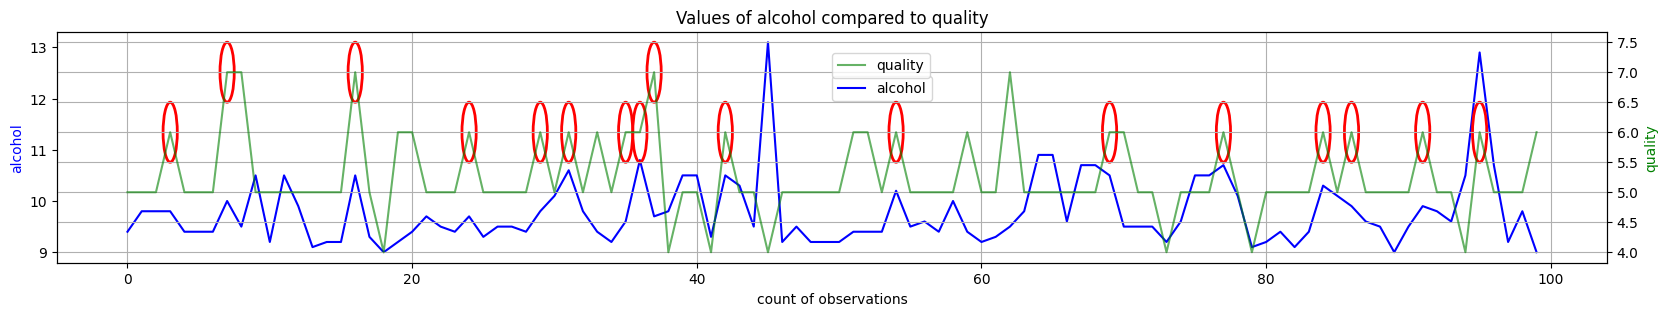

In [19]:
# Names
indep_name = 'alcohol'
dep_name = 'quality'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name} compared to {dep_name}')

# Plot Independent variable
plt.plot(indep, color='b')
ax1.set_ylabel(indep_name, color='b')
ax1.set_xlabel('count of observations')
plt.legend([indep_name], loc=(0.5,0.7))

# Overlay each on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='g', alpha=0.6)
ax2.set_ylabel(dep_name, color='g')
plt.legend([dep_name], loc=(0.5, 0.8))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 9.5 and dep[i] > 5.5:  # Modify conditions as needed
        circle = plt.Circle((i, dep[i]), 0.5, color='red', fill=False, linewidth=2)  # Circle properties
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

## Quality can be low (<5) when VA is high (>0.6) (corr:-0.39)

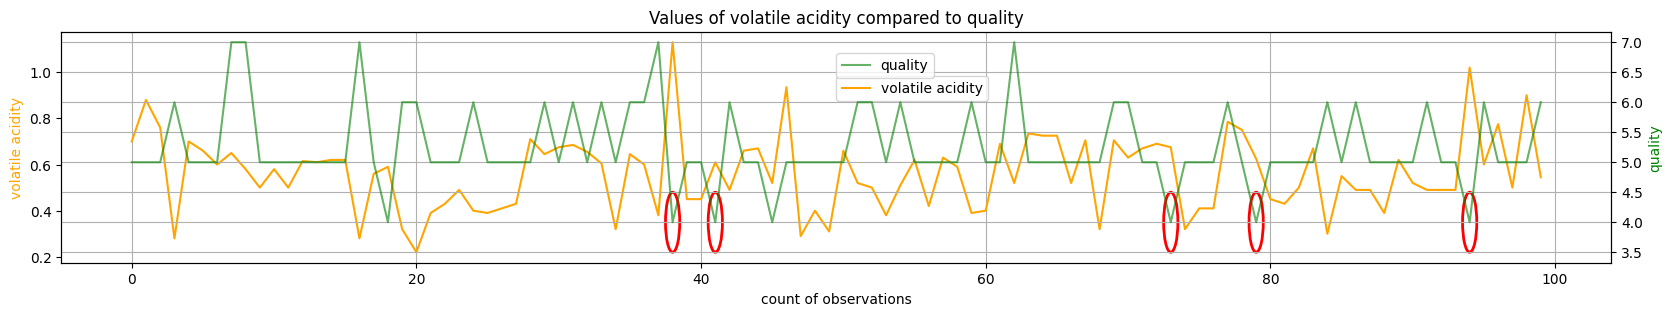

In [20]:
# Names
indep_name = 'volatile acidity'
dep_name = 'quality'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name} compared to {dep_name}')

# Plot Independent variable
plt.plot(indep, color='orange')
ax1.set_ylabel(indep_name, color='orange')
ax1.set_xlabel('count of observations')
plt.legend([indep_name], loc=(0.5,0.7))

# Overlay both graphs on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='g', alpha=0.6)
ax2.set_ylabel(dep_name, color='g')
plt.legend([dep_name], loc=(0.5, 0.8))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > .6 and dep[i] < 5:  # Modify conditions as needed
        circle = plt.Circle((i, dep[i]), 0.5, color='red', fill=False, linewidth=2)  # Circle properties
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

# Sulphates vs Quality (corr: 0.25, weak)

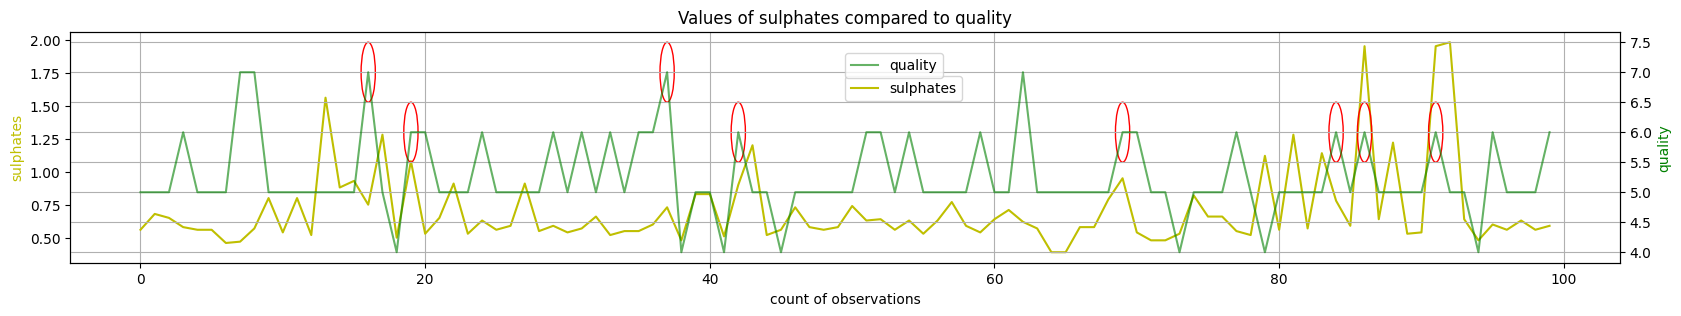

In [21]:
# Names
indep_name = 'sulphates'
dep_name = 'quality'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name} compared to {dep_name}')

# Plot Independent variable
plt.plot(indep, color='y')
ax1.set_ylabel(indep_name, color='y')
plt.legend([indep_name], loc=(0.5,0.7))

# Overlay both graphs on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='g', alpha=0.6)
ax2.set_ylabel(dep_name, color='g')
ax1.set_xlabel('count of observations')
plt.legend([dep_name], loc=(0.5, 0.8))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > .7 and dep[i] > 5.5:  # Modify conditions as needed
        circle = plt.Circle((i, dep[i]), 0.5, color='red', fill=False, linewidth=1)  # Circle properties
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

# Citric Acid vs Quality (corr: 0.23, weak)

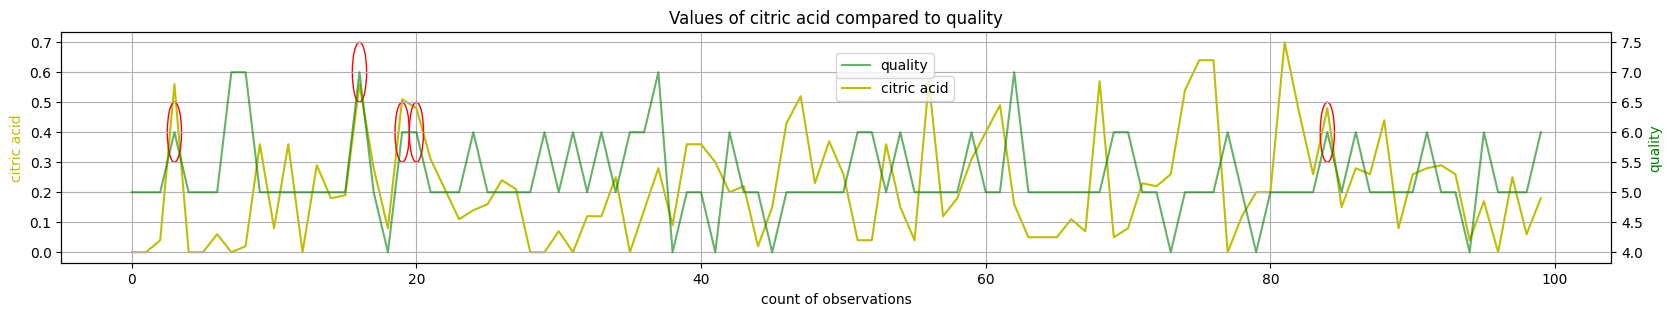

In [22]:
# Names
indep_name = 'citric acid'
dep_name = 'quality'

# Values [start:stop:step size]
indep = df[indep_name].values[:100:1]
dep = df[dep_name].values[:100:1]

# Plot axis
fig, ax1 = plt.subplots(figsize=(20, 3))
plt.title(f'Values of {indep_name} compared to {dep_name}')

# Plot Independent variable
plt.plot(indep, color='y')
ax1.set_ylabel(indep_name, color='y')
ax1.set_xlabel('count of observations')
plt.legend([indep_name], loc=(0.5,0.7))

# Overlay both graphs on same axis
ax2 = ax1.twinx()

# Plot Dependent variable
plt.plot(dep, color='g', alpha=0.6)
ax2.set_ylabel(dep_name, color='g')
plt.legend([dep_name], loc=(0.5, 0.8))

# Circle specified correlation areas
for i in range(len(indep)):
    if indep[i] > 0.4 and dep[i] > 5.1:  # Modify conditions as needed
        circle = plt.Circle((i, dep[i]), 0.5, color='red', fill=False, linewidth=1)  # Circle properties
        ax2.add_patch(circle)

plt.grid(True) #hor grid
ax1.xaxis.grid(True) #vert grid
plt.show()

# Clear variable memory to free storage
# for large datasets
del dep
del indep

# Top aroma Quality correlation: Alcohol (corr: 0.48)

Correlation: 0.47616632400113607


<Figure size 700x600 with 0 Axes>

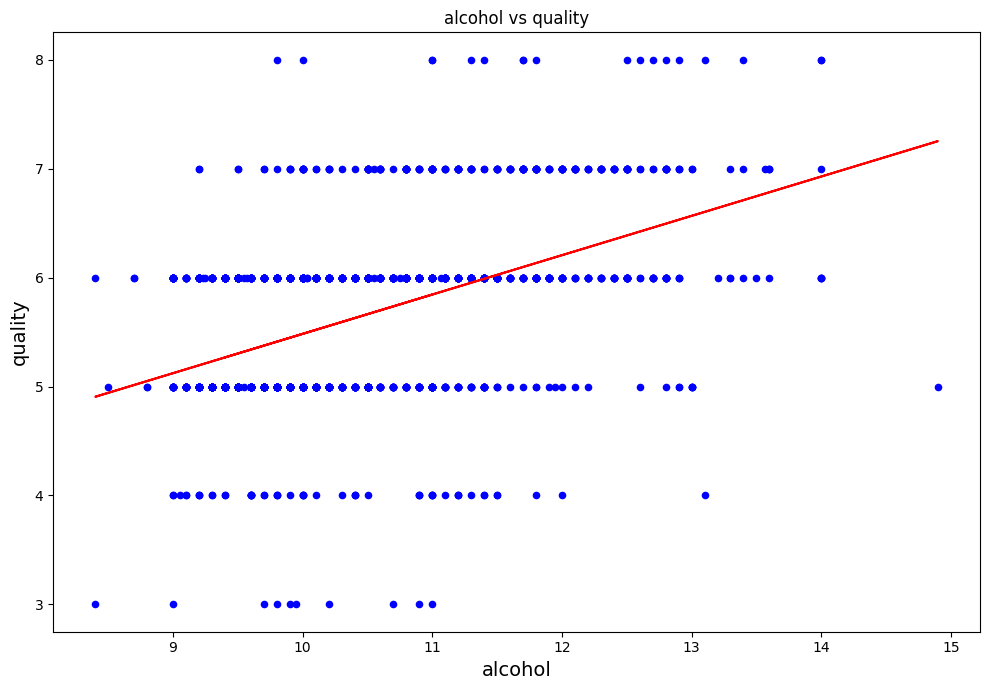

In [23]:
#alcohol
x_name = 'alcohol'
y_name = 'quality'

plt.figure(figsize=(7,6))
x = df[x_name]
y = df[y_name]
df.plot(kind='scatter', x=x_name, y=y_name, color='blue', figsize=(10, 7))

# Fit a linear regression line (y = mx + b)
m, b = np.polyfit(x, y, 1)
# Generate the line for plotting
plt.plot(x, m*x + b, color='red', label=f'Correlation line: y = {m:.2f}x + {b:.2f}')
# Calculate correlation
correlation = np.corrcoef(x, y)[0, 1]
print(f'Correlation: {correlation}')

# scatterplot
# Labels and plot
plt.xlabel(x_name, size=14)
plt.ylabel(y_name, size=14)
plt.title(f'{x_name} vs {y_name}')
plt.tight_layout()
plt.show()

# 2nd Best aroma quality correlation: Sulphates (corr: 0.25)

Correlation: 0.2513970790692614


<Figure size 700x600 with 0 Axes>

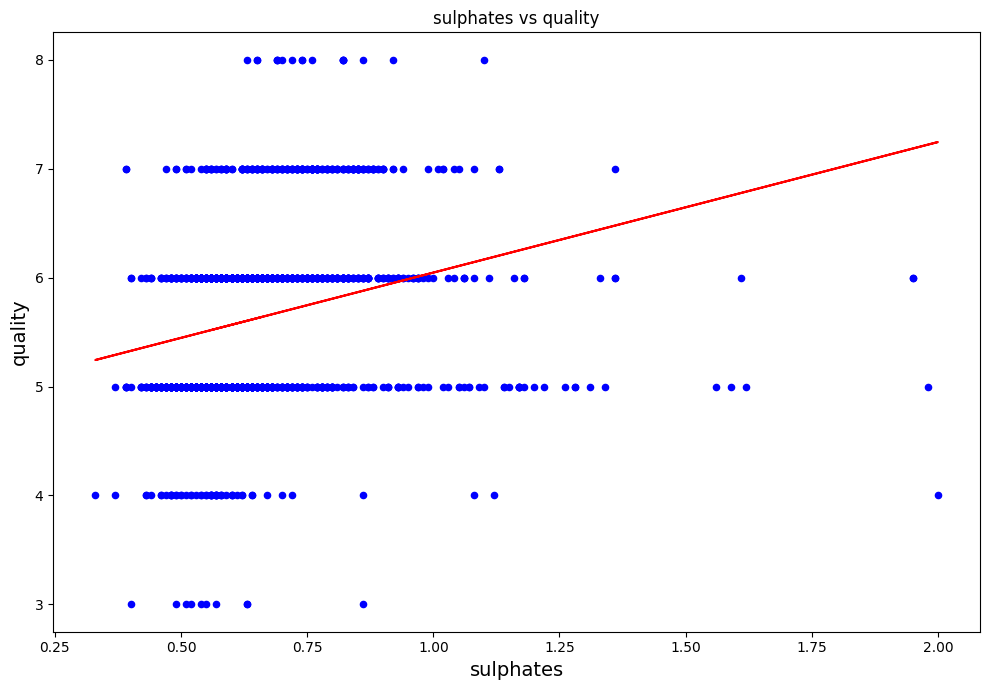

In [24]:
# Sulfates
x_name = 'sulphates'
y_name = 'quality'

plt.figure(figsize=(7,6))
x = df[x_name]
y = df[y_name]
df.plot(kind='scatter', x=x_name, y=y_name, color='blue', figsize=(10, 7))

# Fit a linear regression line (y = mx + b)
m, b = np.polyfit(x, y, 1)
# Generate the line for plotting
plt.plot(x, m*x + b, color='red', label=f'Correlation line: y = {m:.2f}x + {b:.2f}')
# Calculate correlation
correlation = np.corrcoef(x, y)[0, 1]
print(f'Correlation: {correlation}')

# scatterplot
# Labels and plot
plt.xlabel(x_name, size=14)
plt.ylabel(y_name, size=14)
plt.title(f'{x_name} vs {y_name}')
plt.tight_layout()
plt.show()

# 3rd best aroma Quality correlation: Citric Acid (corr: 0.23)

Correlation: 0.22637251431804153


<Figure size 700x600 with 0 Axes>

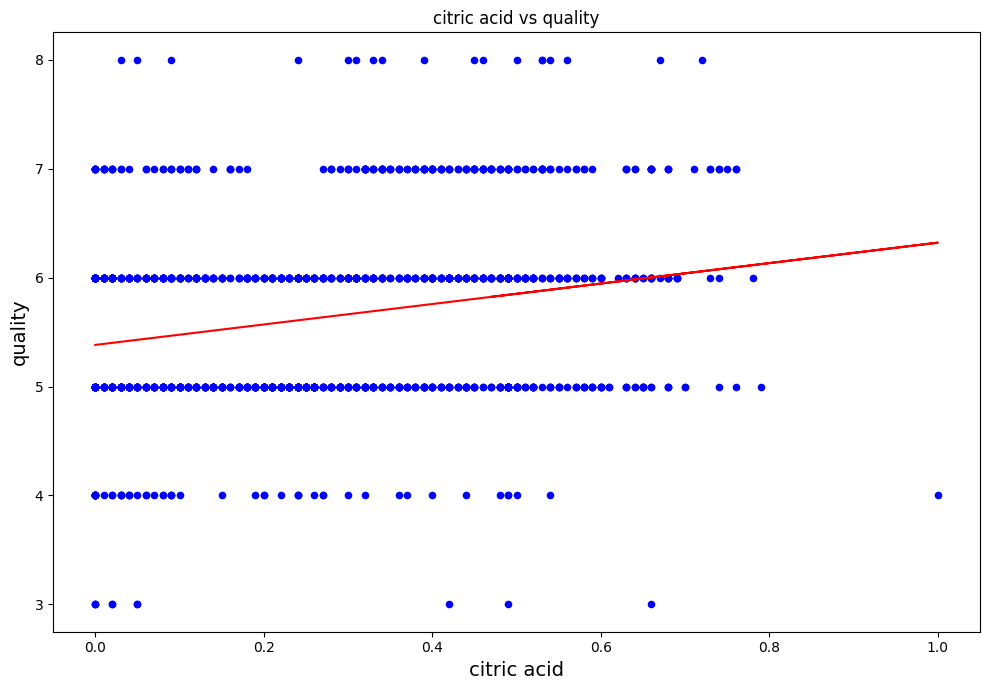

In [25]:
#citric acid
x_name = 'citric acid'
y_name = 'quality'

plt.figure(figsize=(7,6))
x = df[x_name]
y = df[y_name]
df.plot(kind='scatter', x=x_name, y=y_name, color='blue', figsize=(10, 7))

# Fit a linear regression line (y = mx + b)
m, b = np.polyfit(x, y, 1)
# Generate the line for plotting
plt.plot(x, m*x + b, color='red', label=f'Correlation line: y = {m:.2f}x + {b:.2f}')
# Calculate correlation
correlation = np.corrcoef(x, y)[0, 1]
print(f'Correlation: {correlation}')

# scatterplot
# Labels and plot
plt.xlabel(x_name, size=14)
plt.ylabel(y_name, size=14)
plt.title(f'{x_name} vs {y_name}')
plt.tight_layout()
plt.show()